In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
im = cv2.imread('../images/orange15.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

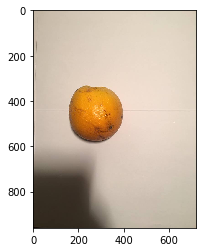

In [10]:
plt.imshow(im)

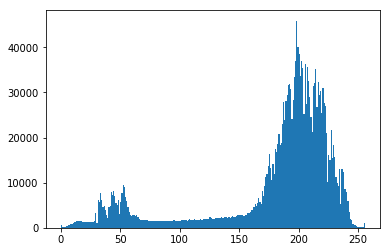

In [11]:
plt.hist(im.ravel(), 256, [0,256]); plt.show()

In [12]:
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
ret,thresh = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY)

edged = cv2.Canny(gray, 50, 100)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
dilated = cv2.dilate(edged, kernel)
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

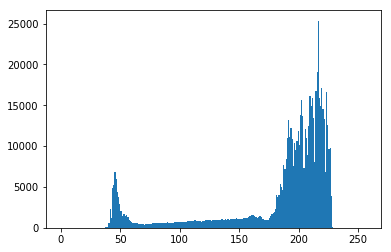

In [13]:
plt.hist(gray.ravel(), 256, [0,256]); plt.show()

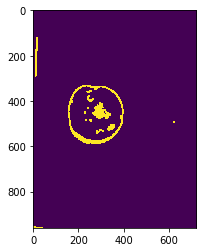

In [14]:
plt.imshow(dilated)

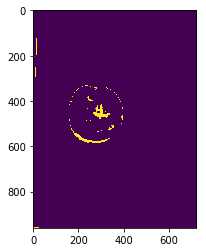

In [27]:
plt.imshow(closed)

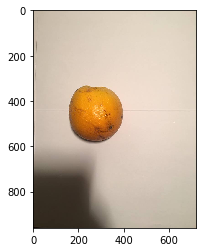

In [28]:
_, cnts, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#cv2.drawContours(im, cnts, -1, (0, 255, 0), 1)
plt.imshow(im)

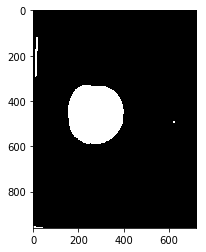

In [29]:
mask = np.zeros_like(im)
#cv2.drawContours(mask, cnts, 0, 255, 3)
cv2.fillPoly(mask, pts=cnts, color=(255,255,255))
plt.imshow(mask)


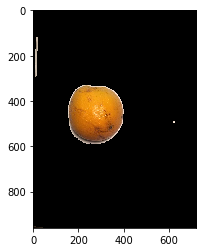

In [30]:
out = np.zeros_like(im)
out[mask==255] = im[mask==255]
plt.imshow(out)

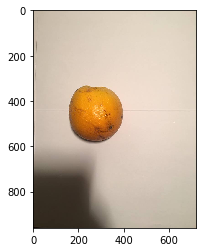

In [31]:
plt.imshow(im)

In [32]:
im2 = im.copy()


In [33]:
mask[:,:,1] = mask[:,:,0]
mask[:,:,2] = mask[:,:,0]

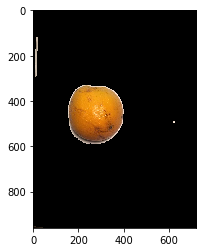

In [34]:
im2[mask!=255] = 0
plt.imshow(im2)

In [35]:
r = im2[:,:,0]
g = im2[:,:,1]
b = im2[:,:,2]

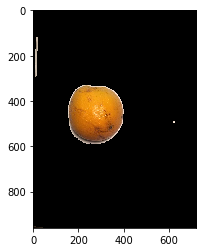

In [36]:
im2[mask==255]
plt.imshow(im2)

In [37]:
r = r[r!=0]
g = g[g!=0]
b = b[b!=0]

In [38]:
color = [r.mean(), g.mean(), b.mean()]
color

[193.95686079309772, 124.3528934609074, 46.23453041761353]